# Topic Modelling

in this notebook, we tackle topic modelling. We use gensim for LDA and Tomotopy for CTM and BERTopic (a model built on top of BERT LLM).

LDA and CTM have been shown to be data hungry to get good results and therefore their reports were less useful than those of BERTopic. Their code can be found in src/topic_modelling.py and the results of LDA can be found inside the reports folder but will not be discussed here. 

All implementations can be found inside src/topic_modelling.py

In [1]:
import pandas as pd
from src.preprocess import load_clean_data
from src.topic_modelling import *
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafiqmazen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafiqmazen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/rafiqmazen/anaconda3/envs/poli/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = load_clean_data("preprocessed_data/clean_data.csv")

In [3]:
tweet_list = df.tweets.to_list()
P_leaning_tweet_list = df[df["leaning"]=="palestine"].tweets.to_list()
I_leaning_tweet_list = df[df["leaning"]=="israel"].tweets.to_list()
C_leaning_tweet_list = df[df["leaning"]=="center"].tweets.to_list()

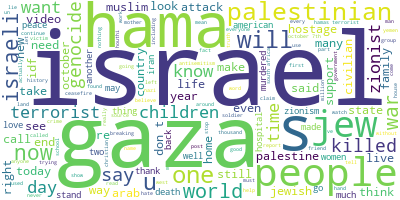

In [4]:
# Let's generate a wordcloud of all tweets
generate_wordcloud(df.tweets.to_list())

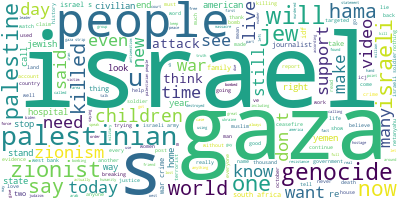

In [5]:
# Let's generate a wordcloud of Palestine-leaning tweets
generate_wordcloud(P_leaning_tweet_list)

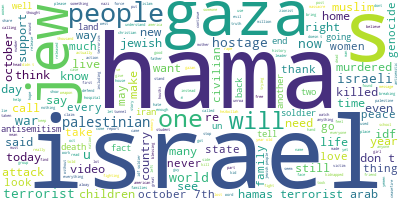

In [6]:
# Let's generate a wordcloud of Israel-leaning tweets
generate_wordcloud(I_leaning_tweet_list)

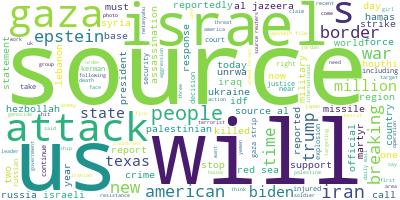

In [7]:
# Let's generate a wordcloud of centre-leaning tweets
generate_wordcloud(C_leaning_tweet_list)

In [8]:
model = gensim_topic_modelling(tweet_list, num_topics=15, visualize = True, filepath="reports/all_tweets")

html saved to: reports/all_tweets_gensim_LDA.html


In [9]:
model = gensim_topic_modelling(P_leaning_tweet_list, num_topics=15, visualize = True, filepath="reports/palestine_leaning")

html saved to: reports/palestine_leaning_gensim_LDA.html


In [10]:
model = gensim_topic_modelling(I_leaning_tweet_list, num_topics=15, visualize = True, filepath="reports/israel_leaning")

html saved to: reports/israel_leaning_gensim_LDA.html


As mentioned above, we'll not discuss the results of the LDA models as they are not very informative. But they can be found in the reports folder.

Let's dive right into topic modelling using BERTopic. more info about BERTopic here: https://github.com/MaartenGr/BERTopic

In [11]:
topic_model, topics, probs = bertopic_topic_modelling(tweet_list)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

In [12]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 20, title = "Topics for All Tweets", height = 250, width = 320)

In [13]:
topic_model, topics, probs = bertopic_topic_modelling(P_leaning_tweet_list)


In [14]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 20, title = "Topics for Palestine-leaning", height = 250, width = 320)

In [15]:
topic_model, topics, probs = bertopic_topic_modelling(I_leaning_tweet_list)

In [16]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 20, title = "Topics for Israel-leaning", height = 250, width = 350)

In [17]:
topic_model, topics, probs = bertopic_topic_modelling(C_leaning_tweet_list)

In [18]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 20, title = "Topics for Centre-leaning", height = 250, width = 350)